In [1]:
#Feature Engineering
import pandas as pd

In [2]:
df = pd.read_csv("raw_data.csv")

#apply -> higher order function
df["tax"] = df["income"].apply(lambda x: "20%" if x >= 60000 else "10%")

In [3]:
#map
gender_map = {"Male": "M", "Female": "F", "Unknown": "U"}
df["gender"] = df["gender"].map(gender_map)

In [4]:
#replace
df["country"] = df["country"].replace("USA", "US")

#assign
# df.assign(new_income = df["income"] * 1.1)

In [5]:
#rename
df.rename(columns={"tax": "Tax"})
df.rename(index={1: "First"})

df.sort_values("income")
df = df.fillna(50)
# df.sort_values("income", ascending=False)
sorted_df = df.sort_values(["income", "age"])

sorted_df.sort_index()

#reset
sorted_df.reset_index()
sorted_df.reset_index(drop=True)

#ranking
sorted_df["ranking"] = sorted_df["income"].rank(ascending=False, method="dense")
sorted_df

,id,name,age,country,gender,income,tax,ranking
4,4,Maria Garcia,34.0,Spain,F,50.0,10%,9.0
9,9,Carlos Ruiz,50.0,Mexico,M,45000.0,10%,8.0
3,3,Alex,50.0,US,U,47000.0,10%,7.0
5,5,Li Wei,27.0,China,M,51000.0,10%,6.0
0,1,John Doe,29.0,US,M,55000.0,10%,5.0
1,1,John Doe,29.0,US,M,55000.0,10%,5.0
10,10,Emily Davis,31.0,US,50,58000.0,10%,4.0
8,8,Rachel Lee,29.0,US,F,62000.0,20%,3.0
2,2,Jane Smith,50.0,Canada,F,62000.0,20%,3.0
7,7,Ahmed Khan,38.0,50,M,68000.0,20%,2.0


In [6]:
df2 = df.copy()

new_col_order = [col for col in df2.columns if col != "id"] + ["id"]

df2[new_col_order]

,name,age,country,gender,income,tax,id
0,John Doe,29.0,US,M,55000.0,10%,1
1,John Doe,29.0,US,M,55000.0,10%,1
2,Jane Smith,50.0,Canada,F,62000.0,20%,2
3,Alex,50.0,US,U,47000.0,10%,3
4,Maria Garcia,34.0,Spain,F,50.0,10%,4
5,Li Wei,27.0,China,M,51000.0,10%,5
6,50,45.0,India,F,73000.0,20%,6
7,Ahmed Khan,38.0,50,M,68000.0,20%,7
8,Rachel Lee,29.0,US,F,62000.0,20%,8
9,Carlos Ruiz,50.0,Mexico,M,45000.0,10%,9


In [7]:
df2 = df.copy()

df2 = df2.drop_duplicates()
df2 = df2.sort_values("income")

df2.reset_index(drop=True)

df2.to_csv("sorted_data.csv")

In [8]:
df2

,id,name,age,country,gender,income,tax
4,4,Maria Garcia,34.0,Spain,F,50.0,10%
9,9,Carlos Ruiz,50.0,Mexico,M,45000.0,10%
3,3,Alex,50.0,US,U,47000.0,10%
5,5,Li Wei,27.0,China,M,51000.0,10%
0,1,John Doe,29.0,US,M,55000.0,10%
10,10,Emily Davis,31.0,US,50,58000.0,10%
2,2,Jane Smith,50.0,Canada,F,62000.0,20%
8,8,Rachel Lee,29.0,US,F,62000.0,20%
7,7,Ahmed Khan,38.0,50,M,68000.0,20%
6,6,50,45.0,India,F,73000.0,20%


In [9]:
df2.groupby("country")["income"].mean()
df2.groupby("country")["income"].min()
df2.groupby("country")["income"].max()

df2.groupby("gender")["income"].mean()
df2.groupby("gender")["income"].max()

# df2.groupby("country")["income"].agg(["mean", "min", "max"])
df2.groupby("country")["income"].agg(avg_salary = "mean", min_salary = "min", max_salary = "max")

df2.groupby("country").agg({
    "income" : "max",
    "age" : "mean"
})

df.groupby("country").agg(
    max_salary = ("income", "max"),
    avg_age = ("age", "mean")
)

,max_salary,avg_age
country,,
50,68000.0,38.0
Canada,62000.0,50.0
China,51000.0,27.0
India,73000.0,45.0
Mexico,45000.0,50.0
Spain,50.0,34.0
US,62000.0,33.6


In [15]:
# Melt and Pivot

df = pd.DataFrame({
    "country": ["USA", "USA", "india", "india"],
    "year": [2020, 2021, 2020, 2021],
    "sales": [100, 120, 90, 110],
    "profit": [20, 25, 18, 22],
})

melted_df = df.melt(
    id_vars = ["country", "year"],
    value_vars = ["sales", "profit"],
    var_name = "metrics",
    value_name = "value"
)

melted_df

original = melted_df.pivot(
    index=["country", "year"],
    columns= "metrics",
    values="value"
)

original

metrics       profit  sales
country year               
USA     2020      20    100
        2021      25    120
india   2020      18     90
        2021      22    110

In [12]:
df

,country,year,sales,profit
0,USA,2020,100,20
1,USA,2021,120,25
2,india,2020,90,18
3,india,2021,110,22


<Axes: xlabel='sales', ylabel='profit'>

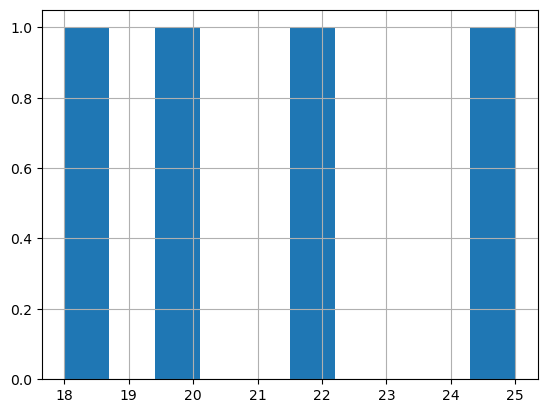

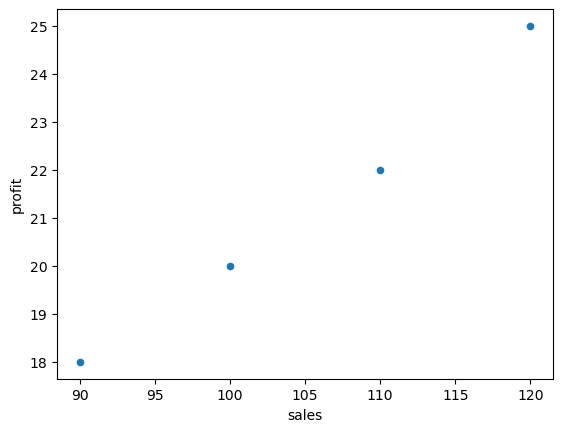

In [20]:
df["profit"].hist()
df.plot(kind="scatter", x="sales", y="profit")